In [1]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps
from numba import jit


# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../programs' )

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

<Figure size 800x1100 with 0 Axes>

In [2]:
import decorators
import plot_tool

In [3]:
def make_random_noise():
    global N            # サンプル数
    global fs
    global dt
    global f1, f2, f3
    global t
    
    noise = 0.5*np.random.randn(N)
    x = 3*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.2*np.sin(2*np.pi*f3*t) + noise# 信号
    return x


In [4]:
N = 4096            # サンプル数
fs = 1000
dt = 1/fs            # サンプリング周期 [s]
f1, f2, f3 = 10, 60, 300 # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]

In [5]:
test_signal = make_random_noise()

In [6]:
test_signal

array([-0.44644993,  0.37394545,  0.49079632, ..., -2.21896972,
       -1.33096026, -1.32814224])

In [7]:
# LPF設計
lpf_cutoff_hz = 200.0
lpf_cutoff = lpf_cutoff_hz / (fs/2.0)
win = "hamm"
lpf = signal.firwin(N, lpf_cutoff, window=win)

In [8]:
# 線形フィルタ適用
@decorators.stop_watch
def filter_on_t(data):
    ys = signal.lfilter(lpf, [1.0], data)
    return ys

In [9]:
# 周波数領域フィルタ適用
@decorators.stop_watch
def filter_on_f(data):
    zs = signal.fftconvolve(data, lpf, mode="same")
    return zs

In [10]:
ys = filter_on_t(test_signal)

###############  START  ###############
###############  END  ###############
0.0047[sec] elapsed to execute the function:filter_on_t


In [11]:
zs = filter_on_f(test_signal)

###############  START  ###############
###############  END  ###############
0.00158[sec] elapsed to execute the function:filter_on_f


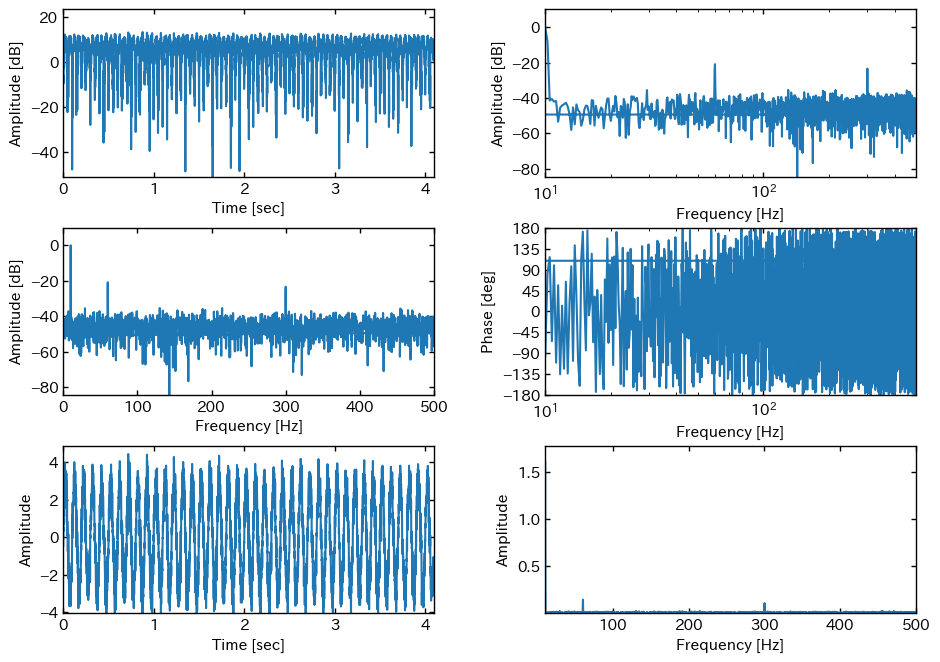

In [12]:
plot_tool.plot_3charts(N=N, y=test_signal, fs=fs)

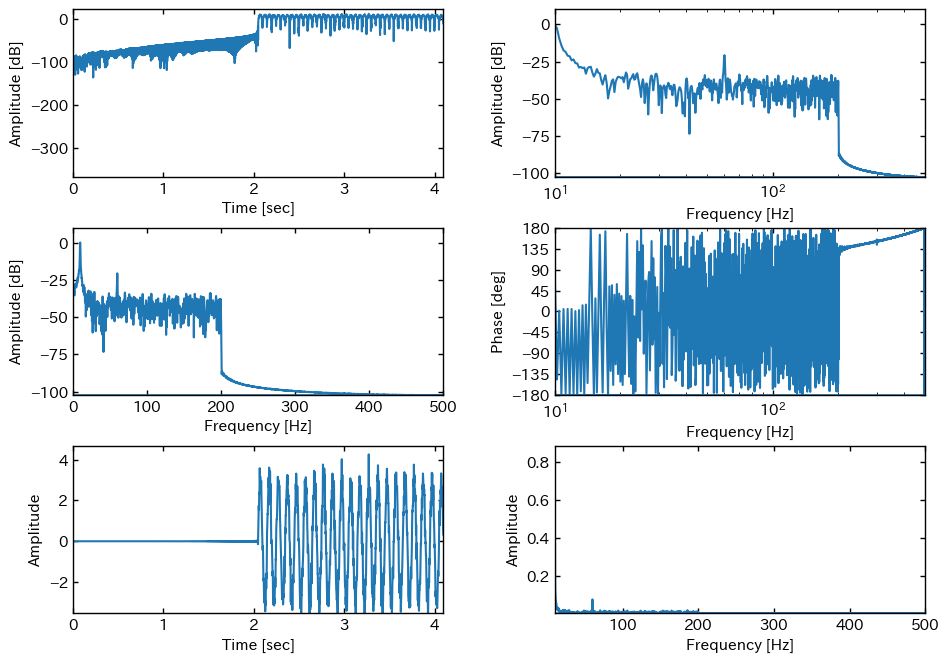

In [13]:
plot_tool.plot_3charts(N=N, y=ys, fs=fs)

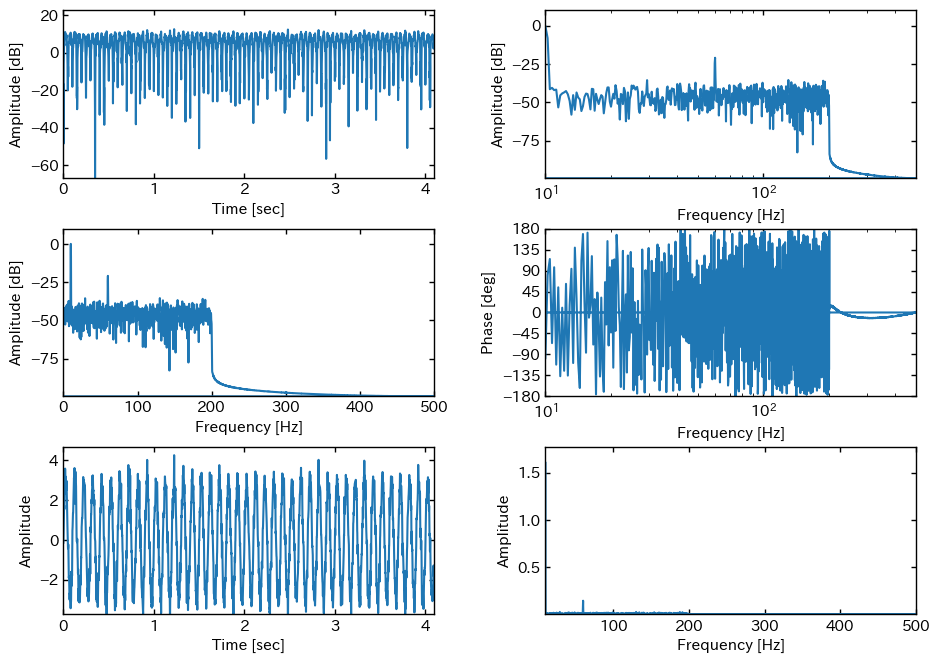

In [14]:
plot_tool.plot_3charts(N=N, y=zs, fs=fs)

In [15]:
print(plot_tool.plot_3charts.__doc__)


    Parameters
    -----------------
    N : int
        FFT length
    y : list(int)
        Data for analysis
    fs : int
        Sampling freqency
    start_sec : float64
        Start sec
    window_func_name: str
        window_func_name :
            "hamming"
            "hanning"
            "bartlett"
            "blackman"
            "kaiser"

    Usage example
    -----------------
    plot_3charts(N=N, y=data, fs=fs, start_sec=3, window_func_name="hamming")
    


### FFTの長さNが長いときは時間領域の畳込みよりも周波数領域の掛け算のほうが早い

In [16]:
@decorators.stop_watch
def rand_append():
    a = []
    for i in range(100000000):
        a.append(i)
        
    return a

In [17]:
@decorators.stop_watch
def rand_listin():
    a = [i for i in range(100000000)]
    return a

In [18]:
a = rand_append()

###############  START  ###############
###############  END  ###############
8.05742[sec] elapsed to execute the function:rand_append


In [19]:
a = rand_listin()

###############  START  ###############
###############  END  ###############
5.04635[sec] elapsed to execute the function:rand_listin


In [64]:
class ref_speed_test(object):
    def __init__(self, a=5):
        self.a = 1 / a

In [65]:
A = ref_speed_test(a=5)

In [69]:
@decorators.stop_watch
def print_propaty(num):
    for _ in range(10000000):
        x = A.a
    print(x)

In [70]:
@decorators.stop_watch
def print_args(num):
    for _ in range(10000000):
        x = 1 / num
    print(x)

In [71]:
print_propaty(8)

###############  START  ###############
0.2
###############  END  ###############
0.59382[sec] elapsed to execute the function:print_propaty


In [72]:
print_args(5)

###############  START  ###############
0.2
###############  END  ###############
0.41246[sec] elapsed to execute the function:print_args
